# 프로젝트 개요
### Kaggle Telcom Customer Churn
* 이커머스는 새로운 고객을 확보하는데 드는 비용이 기존 고객을 유지하는 비용보다 훨씬 크기 때문에 고객 이탈율에 특히 집중합니다. 해당 프로젝트를 통해 Telcom 통신사의 고객이탈에 영향을 미치는 다양한 요인들을 파악하고 이탈을 미리 예측하고 이를 미리 방지하여 최종적으로는 고객총가치(CLV)를 높이는데 기여하고자 합니다.

- <a href='#1'>1. Data</a>
    - <a href='#1.1'>1.1. Data overview</a>
- <a href='#2'>2. Data Manipulation</a>
- <a href='#3'>3. Exploratory Data Analysis</a>
- <a href='#4'>4. Data preprocessing</a>
- <a href='#5'>5. Model Building</a>
    - <a href='#5.1'>5.1. Baseline Model</a>
    - <a href='#5.2'>5.2. Synthetic Minority Oversampling TEchnique (SMOTE)</a>
    - <a href='#5.3'>5.3. Univariate Selection</a>
    - <a href='#5.4'>5.4. Random forest classifier.</a>
    - <a href='#5.5'>5.5. LightGBMClassifier</a>
    - <a href='#5.6'>5.6. XGBoost  Classifier</a>
- <a href='#6'>6. Model Performances</a>
   


In [75]:
#Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the "../input/" directory.
import os
import matplotlib.pyplot as plt#visualization
from PIL import  Image
%matplotlib inline
import pandas as pd
import seaborn as sns#visualization
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
import seaborn as sns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# <a id='1'>1.Data</a>

In [2]:
telcom = pd.read_csv('./telco.csv')
telcom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## <a id='1.1'>1.1. Data overview</a>

In [3]:
print(telcom.shape)
print("\nFeatures : \n ", telcom.columns.tolist())
print("\nNull values: \n ", telcom.isnull().sum())
print("\nUnique values: \n ", telcom.nunique())

(7043, 21)

Features : 
  ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Null values: 
  customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Unique values: 
  customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure        

# <a id='2'>2. Data Manipulation</a>

In [4]:
# 공백값을 null값으로 변경한 뒤 int type으로 변환
telcom['TotalCharges'] = telcom['TotalCharges'].replace(' ',np.nan)
telcom['TotalCharges'] = pd.to_numeric(telcom['TotalCharges'])

#TotalCharges의 null값은 0.15% 정도로 삭제해도 무방
print(len(telcom[telcom['TotalCharges'].isnull()])/len(telcom))
telcom =  telcom[telcom['TotalCharges'].notnull()]
telcom = telcom.reset_index()[telcom.columns]

0.001561834445548772


In [5]:
for i in range(6,14):
    a = telcom.iloc[:,i].value_counts()
    print(a, "\n")

Yes    6352
No      680
Name: PhoneService, dtype: int64 

No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64 

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64 

No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64 

No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64 

No                     3094
Yes                    2418
No internet service    1520
Name: DeviceProtection, dtype: int64 

No                     3472
Yes                    2040
No internet service    1520
Name: TechSupport, dtype: int64 

No                     2809
Yes                    2703
No internet service    1520
Name: StreamingTV, dtype: int64 



In [6]:
#convert to float type
telcom["TotalCharges"] = telcom["TotalCharges"].astype(float)

# No internet service의 값은 No로 변경
replace_cols = [ 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies']

for i in replace_cols:
    telcom[i] = telcom[i].replace('No internet service', 'No')
    
#No phone serivce의 값은 No로 변경
telcom['MultipleLines'].replace('No phone service', 'No')

0        No
1        No
2        No
3        No
4        No
       ... 
7027    Yes
7028    Yes
7029     No
7030    Yes
7031     No
Name: MultipleLines, Length: 7032, dtype: object

In [7]:
#churn과 not_chunr의 table 분리
churn = telcom[telcom['Churn'] == 'Yes']
not_churn = telcom[telcom['Churn'] == 'No']

In [8]:
# categoricla과 numerical columns 분리
Id_col     = ['customerID']
target_col = ['Churn']
cat_cols = telcom.nunique()[telcom.nunique() < 6].keys().tolist()
cat_cols.remove('Churn')
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
print(cat_cols)
print(num_cols)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
['tenure', 'MonthlyCharges', 'TotalCharges']


## <a id='3.1'>3.1. Variable Summary</a>

In [9]:
telcom.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


# <a id='4'>4. Data preprocessing</a>

In [10]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

#카테고리형
cat_cols   = telcom.nunique()[telcom.nunique() < 6].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]

#숫자형
num_cols   = [x for x in telcom.columns if x not in cat_cols + target_col + Id_col]

#이진형
bin_cols   = telcom.nunique()[telcom.nunique() == 2].keys().tolist()

#카테고리형에서 이진형을 제외한 multiple형
multi_cols = [i for i in cat_cols if i not in bin_cols]

#이진형변수 encoding
le = LabelEncoder()
for i in bin_cols :
    telcom[i] = le.fit_transform(telcom[i])
    
#multiple형변수 encoding
telcom = pd.get_dummies(data = telcom,columns = multi_cols )
telcom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,0,1,0,0,0,0,1,29.85,29.85,0,0,1,0,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,1,0,0,0,34,1,1,0,1,0,0,0,0,56.95,1889.50,0,1,0,0,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,1,0,0,0,2,1,1,1,0,0,0,0,1,53.85,108.15,1,1,0,0,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,1,1,0,0,0,42.30,1840.75,0,0,1,0,1,0,0,0,1,0,1,0,0,0
4,9237-HQITU,0,0,0,0,2,1,0,0,0,0,0,0,1,70.70,151.65,1,1,0,0,0,1,0,1,0,0,0,0,1,0


In [11]:
#수치형변수 scaling
std = StandardScaler()
scaled = std.fit_transform(telcom[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)

#수치형변수 drop하고 scaled된 변수로 merge
df_telcom_og = telcom.copy()
telcom = telcom.drop(columns = num_cols,axis = 1)
telcom = telcom.merge(scaled,left_index=True,right_index=True,how = "left")


In [12]:
import chart_studio
import chart_studio.plotly as py
import plotly.graph_objects as go
from plotly.offline import plot
chart_studio.plotly

<module 'chart_studio.plotly' from 'C:\\Users\\user\\Anaconda3\\lib\\site-packages\\chart_studio\\plotly\\__init__.py'>

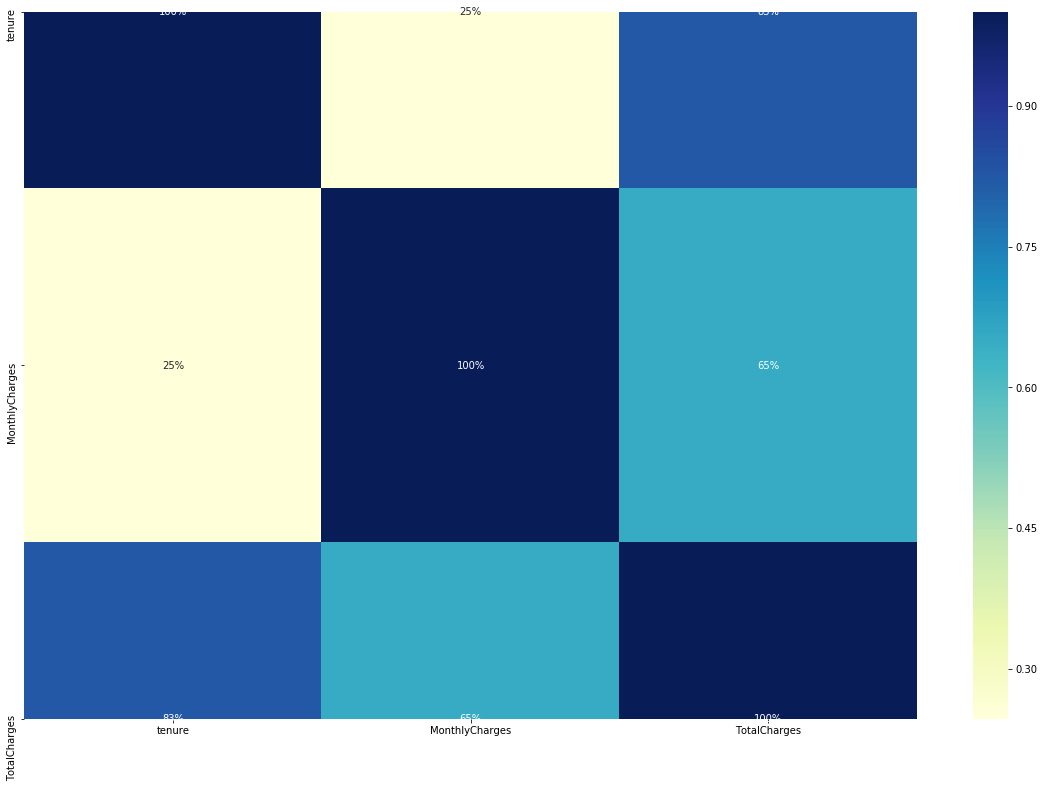

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

cor = df_telcom_og[num_cols].corr()
plt.figure(figsize=(20,13))

sns.heatmap(cor ,cmap="YlGnBu",annot=True,fmt='.0%')

## <a id='4.1'>4.1. Correlation Matrix</a>

In [14]:
a = [i for i in telcom.columns if i in num_cols]
b = [i for i in telcom.columns if i in num_cols]

from scipy.stats import pearsonr
final = []
f1 = []
f2 = []
for i in a:
    for j in b:
        c = pearsonr(df_telcom_og[i],df_telcom_og[j])
        final.append(c)
        f1.append(i)
        f2.append(j)

# coefficient, p-value, feature를 dataframe으로 확인
df_pvalue = pd.DataFrame(final, columns =['coeff', 'p-value']) 
features = pd.DataFrame(f1, columns=['f1'])
features2 = pd.DataFrame(f2, columns=['f2'])
df_pvalue['coeff'] = abs(df_pvalue['coeff'])
df_pvalue2 = pd.concat([df_pvalue, features, features2], axis=1 )
df_pvalue2

# 상관계수가 .3 이상, p-value가 .05이하인 feature확인
df_pvalue2['threshold'] = [1 if i > 0.3 else 0 for i in df_pvalue2['coeff']]
df_pvalue2['tag'] = [1 if i < 0.05 else 0 for i in df_pvalue2['p-value']]
df_pvalue2['sum'] = df_pvalue2['threshold'] + df_pvalue2['tag']
m_features = df_pvalue2[(df_pvalue2['sum'] == 2) & (df_pvalue2['f1'] != df_pvalue2['f2'])]
m_features

,coeff,p-value,f1,f2,threshold,tag,sum
2,0.825880,0.0,tenure,TotalCharges,1,1,2
5,0.651065,0.0,MonthlyCharges,TotalCharges,1,1,2
6,0.825880,0.0,TotalCharges,tenure,1,1,2
7,0.651065,0.0,TotalCharges,MonthlyCharges,1,1,2


## <a id='4.1'>4.1. PCA(Principal Component Analysis)</a>
* PCA설명력이 67%이라서 유의미하지 변수가 아니라고 판단

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 3)

X = telcom[[i for i in telcom.columns if i not in Id_col + target_col]]
Y = telcom[target_col + Id_col]

principal_components = pca.fit_transform(X)
pca.explained_variance_ratio_

array([0.35999773, 0.1616392 , 0.06160266])

# <a id='5'>5. Model Building</a>
## <a id='5.1'>5.1. Baseline Model</a>

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,roc_curve,scorer
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve,accuracy_score,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

#splitting train and test data 
train,test = train_test_split(telcom,test_size = .25 ,random_state = 111)
    
##seperating dependent and independent variables

cols    = [i for i in telcom.columns if i not in Id_col + target_col]
train_X = train[cols]
train_Y = train[target_col]
test_X  = test[cols]
test_Y  = test[target_col]

In [18]:
# roc curve 생성을 위한 함수
def precision_recall_curve_plot(y_test=None, pred_proba_c1=None):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

    coefficients                                 features
18      0.667516                  Contract_Month-to-month
16      0.640360              InternetService_Fiber optic
27      0.622686                             TotalCharges
11      0.367842                         PaperlessBilling
23      0.236863           PaymentMethod_Electronic check
10      0.232279                          StreamingMovies
1       0.201315                            SeniorCitizen
13      0.194556           MultipleLines_No phone service
9       0.145270                              StreamingTV
26      0.122215                           MonthlyCharges
14      0.063809                        MultipleLines_Yes
19      0.013936                        Contract_One year
2      -0.009984                                  Partner
21     -0.015148  PaymentMethod_Bank transfer (automatic)
15     -0.019150                      InternetService_DSL
7      -0.054691                         DeviceProtection
24     -0.0677

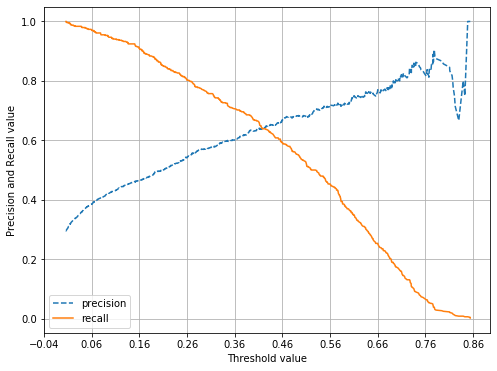

In [19]:
logit  = LogisticRegression(C=1.0, class_weight=None,max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, verbose=0)

logit.fit(train_X,train_Y)
predictions = logit.predict(test_X)
probabilities = logit.predict_proba(test_X)
coefficients  = pd.DataFrame(logit.coef_.ravel())

column_df     = pd.DataFrame(cols)
coef_sumry    = (pd.merge(coefficients,column_df,left_index= True,
                          right_index= True, how = "left"))
coef_sumry.columns = ["coefficients","features"]
coef_sumry    = coef_sumry.sort_values(by = "coefficients",ascending = False)
print(coef_sumry)

print ("\n Classification report : \n",classification_report(test_Y,predictions))

#confusion matrix
conf_matrix = confusion_matrix(test_Y,predictions)
print ("Confusion matrix : \n",confusion_matrix(test_Y,predictions) ,"\n")
#roc_auc_score
print ("Accuracy   Score : ",accuracy_score(test_Y,predictions))
print ("Area under curve : ",roc_auc_score(test_Y,predictions))

precision_recall_curve_plot(test_Y, probabilities[:, 1])

## <a id='5.2'>5.2. Synthetic Minority Oversampling TEchnique (SMOTE)</a>

SMOTE결과
0    3895
1    1379
Name: Churn, dtype: int64
1    3895
0    3895
Name: Churn, dtype: int64 

    coefficients                                 features
27      0.949386                             TotalCharges
18      0.668403                  Contract_Month-to-month
11      0.426328                         PaperlessBilling
16      0.400630              InternetService_Fiber optic
10      0.224135                          StreamingMovies
23      0.195065           PaymentMethod_Electronic check
26      0.181911                           MonthlyCharges
1       0.141063                            SeniorCitizen
9       0.112599                              StreamingTV
13      0.038910           MultipleLines_No phone service
2       0.005972                                  Partner
19     -0.017705                        Contract_One year
7      -0.052074                         DeviceProtection
21     -0.067300  PaymentMethod_Bank transfer (automatic)
0      -0.073425            

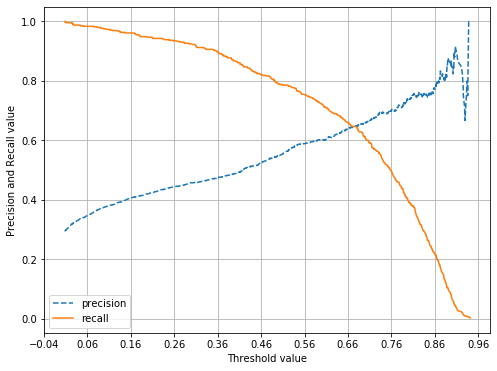

In [60]:
from imblearn.over_sampling import SMOTE

cols    = [i for i in telcom.columns if i not in Id_col+target_col]

smote_X = telcom[cols]
smote_Y = telcom[target_col]

#train data, test data 분리하기
smote_train_X,smote_test_X,smote_train_Y,smote_test_Y = train_test_split(smote_X,smote_Y,
                                                                         test_size = .25 ,
                                                                         random_state = 111)

#SMOTE(Oversampling)
os = SMOTE(random_state = 0)
os_smote_X,os_smote_Y = os.fit_sample(smote_train_X,smote_train_Y)
os_smote_X = pd.DataFrame(data = os_smote_X,columns=cols)
os_smote_Y = pd.DataFrame(data = os_smote_Y,columns=target_col)
print('SMOTE결과')
print(smote_train_Y['Churn'].value_counts())
print(os_smote_Y['Churn'].value_counts(),"\n")


logit_smote = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

# telecom_churn_prediction(logit_smote,os_smote_X,test_X,os_smote_Y,test_Y,
#                          cols,"coefficients")


logit_smote.fit(os_smote_X,os_smote_Y )
predictions = logit_smote.predict(smote_test_X)
probabilities = logit_smote.predict_proba(smote_test_X)
coefficients  = pd.DataFrame(logit_smote.coef_.ravel())

column_df     = pd.DataFrame(cols)
coef_sumry    = (pd.merge(coefficients,column_df,left_index= True,
                          right_index= True, how = "left"))
coef_sumry.columns = ["coefficients","features"]
coef_sumry    = coef_sumry.sort_values(by = "coefficients",ascending = False)
print(coef_sumry)

print ("\n Classification report : \n",classification_report(smote_test_Y,predictions))

#confusion matrix
conf_matrix = confusion_matrix(smote_test_Y,predictions)
print ("Confusion matrix : \n",confusion_matrix(smote_test_Y,predictions) ,"\n")
#roc_auc_score
print ("Accuracy   Score : ",accuracy_score(smote_test_Y,predictions))
print ("Area under curve : ",roc_auc_score(smote_test_Y,predictions))

precision_recall_curve_plot(smote_test_Y, probabilities[:, 1])

## <a id='5.3'>5.3. Univariate Selection</a>

In [ ]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

#select columns
cols = [i for i in telcom.columns if i not in Id_col + target_col ]

#dataframe with non negative values
df_x = df_telcom_og[cols]
df_y = df_telcom_og[target_col]

#fit model with k= 3
select = SelectKBest(score_func = chi2,k = 3)
fit    = select.fit(df_x,df_y)

#Summerize scores
print ("scores")
print (fit.scores_)
print ("P - Values")
print (fit.pvalues_)

#create dataframe
score = pd.DataFrame({"features":cols,"scores":fit.scores_,"p_values":fit.pvalues_ })
score = score.sort_values(by = "scores" ,ascending =False)
print(score)

#createing new label for categorical and numerical columns
score["feature_type"] = np.where(score["features"].isin(num_cols),"Numerical","Categorical")
score["feature_type"] 

fit

## <a id='5.4'>5.4. Random forest classifier</a>

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from sklearn import tree
from graphviz import Source
from IPython.display import SVG,display

def plot_tree_randomforest(columns,nf_estimators,
                           estimated_tree,maximum_depth,
                           criterion_type,model_performance = None) :
    
    dataframe = df_telcom_og[columns + target_col].copy()
    
    #train and test datasets
    rf_x     = dataframe[[i for i in columns if i not in target_col]]
    rf_y     = dataframe[target_col]
    
    #random forest classifier
    rfc   = RandomForestClassifier(n_estimators = 100,
                                   max_depth =3,
                                   criterion = 'gini',
                                  )
    rfc.fit(rf_x,rf_y)
    
    estimated_tree = rfc.estimators_[estimated_tree]
    
    graph = Source(tree.export_graphviz(estimated_tree,out_file=None,
                                        rounded=True,proportion = False,
                            feature_names = columns, 
                            precision  = 2,
                            class_names=["Not churn","Churn"],
                            filled = True))
    display(graph)

   coefficients                        features
0      0.491770         Contract_Month-to-month
3      0.230437     InternetService_Fiber optic
2      0.152431  PaymentMethod_Electronic check
1      0.125362               Contract_Two year

 Classification report : 
               precision    recall  f1-score   support

           0       0.81      0.90      0.85      1268
           1       0.63      0.44      0.52       490

    accuracy                           0.77      1758
   macro avg       0.72      0.67      0.69      1758
weighted avg       0.76      0.77      0.76      1758

Confusion matrix : 
 [[1143  125]
 [ 273  217]] 

Accuracy   Score :  0.7736063708759955
Area under curve :  0.672138350608382


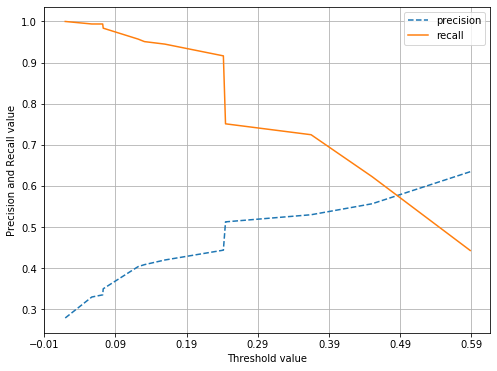

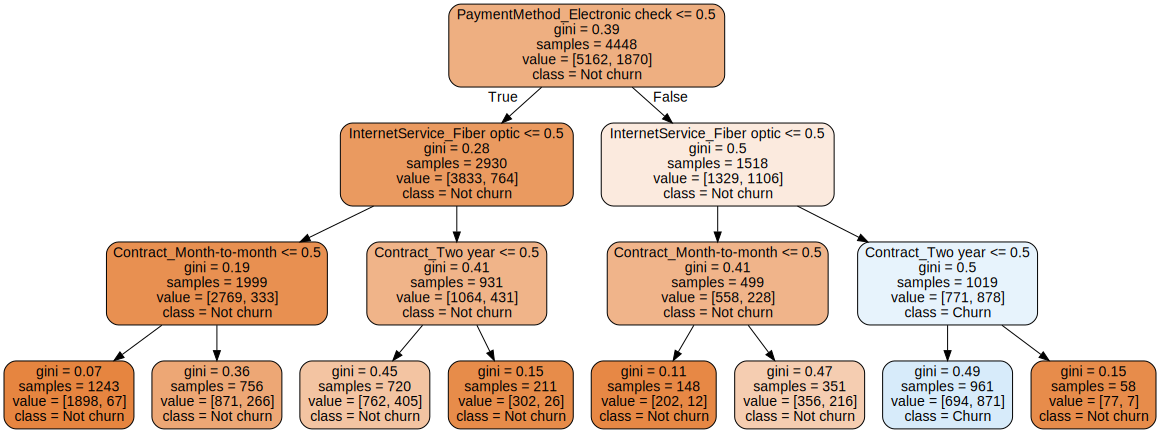

In [71]:
columns  = score[score["feature_type"] == "Categorical"]["features"][:4].tolist()
dataframe = df_telcom_og[columns + target_col].copy()

#train and test datasets
rf_x     = dataframe[[i for i in columns if i not in target_col]]
rf_y     = dataframe[target_col]
    
rfc   = RandomForestClassifier(n_estimators = 100,
                                   max_depth =3,
                                   criterion = 'gini',)
rfc.fit(rf_x,rf_y)

estimated_tree = rfc.estimators_

predictions = rfc.predict(test_X[columns])
probabilities = rfc.predict_proba(test_X[columns])
coefficients  = pd.DataFrame(rfc.feature_importances_)

column_df     = pd.DataFrame(columns)
coef_sumry    = (pd.merge(coefficients,column_df,left_index= True,
                          right_index= True, how = "left"))
coef_sumry.columns = ["coefficients","features"]
coef_sumry    = coef_sumry.sort_values(by = "coefficients",ascending = False)
print(coef_sumry)

print ("\n Classification report : \n",classification_report(test_Y,predictions))

#confusion matrix
conf_matrix = confusion_matrix(test_Y,predictions)
print ("Confusion matrix : \n",confusion_matrix(test_Y,predictions) ,"\n")
#roc_auc_score
print ("Accuracy   Score : ",accuracy_score(test_Y,predictions))
print ("Area under curve : ",roc_auc_score(test_Y,predictions))

precision_recall_curve_plot(test_Y, probabilities[:, 1])

plot_tree_randomforest(features_cat,100,99,3,"gini",True)
    

## <a id='5.5'>5.5. LightGBM classifier</a>

    coefficients                                 features
26          1123                           MonthlyCharges
27           911                             TotalCharges
25           728                                   tenure
0            190                                   gender
11           140                         PaperlessBilling
2            128                                  Partner
3            115                               Dependents
23           112           PaymentMethod_Electronic check
5            104                           OnlineSecurity
6            102                             OnlineBackup
7             96                         DeviceProtection
1             92                            SeniorCitizen
8             89                              TechSupport
10            84                          StreamingMovies
12            83                         MultipleLines_No
24            71               PaymentMethod_Mailed check
22            

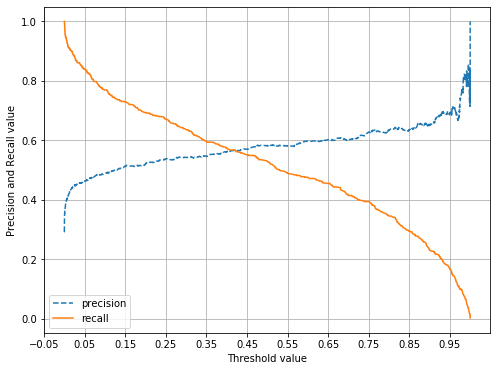

In [65]:
from lightgbm import LGBMClassifier

lgbm_c = LGBMClassifier(boosting_type='gbdt',
                        learning_rate=0.5, max_depth=7, n_estimators=100
                        , num_leaves=100, objective='binary', random_state=None)

lgbm_c.fit(os_smote_X,os_smote_Y )
predictions = lgbm_c.predict(smote_test_X)
probabilities = lgbm_c.predict_proba(smote_test_X)
coefficients  = pd.DataFrame(lgbm_c.feature_importances_)

column_df     = pd.DataFrame(cols)
coef_sumry    = (pd.merge(coefficients,column_df,left_index= True,
                          right_index= True, how = "left"))
coef_sumry.columns = ["coefficients","features"]
coef_sumry    = coef_sumry.sort_values(by = "coefficients",ascending = False)
print(coef_sumry)

print ("\n Classification report : \n",classification_report(smote_test_Y,predictions))

#confusion matrix
conf_matrix = confusion_matrix(smote_test_Y,predictions)
print ("Confusion matrix : \n",confusion_matrix(smote_test_Y,predictions) ,"\n")
#roc_auc_score
print ("Accuracy   Score : ",accuracy_score(smote_test_Y,predictions))
print ("Area under curve : ",roc_auc_score(smote_test_Y,predictions))

precision_recall_curve_plot(smote_test_Y, probabilities[:, 1])

## <a id='5.6'>5.6. XGBoost classifier</a>

    coefficients                                 features
16      0.528445              InternetService_Fiber optic
18      0.248849                  Contract_Month-to-month
17      0.024065                       InternetService_No
19      0.018130                        Contract_One year
10      0.017166                          StreamingMovies
5       0.015004                           OnlineSecurity
9       0.011587                              StreamingTV
8       0.011075                              TechSupport
11      0.010958                         PaperlessBilling
6       0.010159                             OnlineBackup
23      0.009300           PaymentMethod_Electronic check
3       0.008749                               Dependents
4       0.008068                             PhoneService
25      0.007907                                   tenure
12      0.007358                         MultipleLines_No
1       0.007262                            SeniorCitizen
7       0.0070

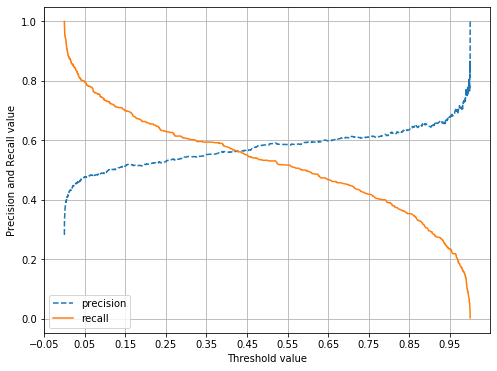

In [66]:
from xgboost import XGBClassifier

xgc = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                    colsample_bytree=1, gamma=0, learning_rate=0.9, max_delta_step=0,
                    max_depth = 7, min_child_weight=1, missing=None, n_estimators=100,
                    n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
                    reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
                    silent=True, subsample=1)


xgc.fit(os_smote_X,os_smote_Y )
predictions = xgc.predict(smote_test_X)
probabilities = xgc.predict_proba(smote_test_X)
coefficients  = pd.DataFrame(xgc.feature_importances_)

column_df     = pd.DataFrame(cols)
coef_sumry    = (pd.merge(coefficients,column_df,left_index= True,
                          right_index= True, how = "left"))
coef_sumry.columns = ["coefficients","features"]
coef_sumry    = coef_sumry.sort_values(by = "coefficients",ascending = False)
print(coef_sumry)

print ("\n Classification report : \n",classification_report(smote_test_Y,predictions))

#confusion matrix
conf_matrix = confusion_matrix(smote_test_Y,predictions)
print ("Confusion matrix : \n",confusion_matrix(smote_test_Y,predictions) ,"\n")
#roc_auc_score
print ("Accuracy   Score : ",accuracy_score(smote_test_Y,predictions))
print ("Area under curve : ",roc_auc_score(smote_test_Y,predictions))

precision_recall_curve_plot(smote_test_Y, probabilities[:, 1])

# <a id='6'>6.Model Performances</a>

In [72]:
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score

#gives model report in dataframe
def model_report(model,training_x,testing_x,training_y,testing_y,name) :
    model.fit(training_x,training_y)
    predictions  = model.predict(testing_x)
    accuracy     = accuracy_score(testing_y,predictions)
    recallscore  = recall_score(testing_y,predictions)
    precision    = precision_score(testing_y,predictions)
    roc_auc      = roc_auc_score(testing_y,predictions)
    f1score      = f1_score(testing_y,predictions) 
    
    df = pd.DataFrame({"Model"           : [name],
                       "Accuracy_score"  : [accuracy],
                       "Recall_score"    : [recallscore],
                       "Precision"       : [precision],
                       "f1_score"        : [f1score],
                       "Area_under_curve": [roc_auc],
                      })
    return df

#outputs for every model
model1 = model_report(logit,train_X,test_X,train_Y,test_Y,
                      "Logistic Regression(Baseline_model)")
model2 = model_report(logit_smote,os_smote_X,test_X,os_smote_Y,test_Y,
                      "Logistic Regression(SMOTE)")
# model3 = model_report(logit_rfe,train_rf_X,test_rf_X,train_rf_Y,test_rf_Y,
#                       "Logistic Regression(RFE)")
# decision_tree = DecisionTreeClassifier(max_depth = 9,
#                                        random_state = 123,
#                                        splitter  = "best",
#                                        criterion = "gini",
#                                       )
# model4 = model_report(decision_tree,train_X,test_X,train_Y,test_Y,
#                       "Decision Tree")
# model5 = model_report(knn,os_smote_X,test_X,os_smote_Y,test_Y,
#                       "KNN Classifier")
rfc = RandomForestClassifier(n_estimators = 1000,
                             random_state = 123,
                             max_depth = 9,
                             criterion = "gini")
model6 = model_report(rfc,train_X,test_X,train_Y,test_Y,
                      "Random Forest Classifier")
# model7 = model_report(gnb,os_smote_X,test_X,os_smote_Y,test_Y,
#                       "Naive Bayes")
model10 = model_report(lgbm_c,os_smote_X,test_X,os_smote_Y,test_Y,
                      "LGBM Classifier(SMOTE)")
model11 = model_report(xgc,os_smote_X,test_X,os_smote_Y,test_Y,
                      "XGBoost Classifier(SMOTE)")

#concat all models
model_performances = pd.concat([model1,model2,model6,
                                
                                model10,model11],axis = 0).reset_index()

model_performances = model_performances.drop(columns = "index",axis =1)

pd.DataFrame(np.round(model_performances,3))


,Model,Accuracy_score,Recall_score,Precision,f1_score,Area_under_curve
0,Logistic Regression(Baseline_model),0.800,0.535,0.679,0.598,0.718
1,Logistic Regression(SMOTE),0.761,0.790,0.549,0.648,0.770
2,Random Forest Classifier,0.797,0.480,0.699,0.569,0.700
3,LGBM Classifier(SMOTE),0.763,0.529,0.582,0.554,0.691
4,XGBoost Classifier(SMOTE),0.765,0.533,0.585,0.558,0.693
